<a href="https://colab.research.google.com/github/daisysong76/Data-AI-Computer-vision/blob/main/MultiModal_RAG_GPTs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#installing various software packages on a Linux-based system using the apt package manager
#Tesseract: an open-source text recognizer (OCR Engine) that can recognize text from images
!sudo apt install tesseract-ocr -y
#installs the development files for Tesseract OCR
!sudo apt install libtesseract-dev -y
#These utilities allow for the conversion of PDF files into various other formats, extraction of text, images, and other data from PDFs, and more
!sudo apt-get install poppler-utils -y

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 45 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 1s (3,528 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debc

In [2]:
!pip install langchain unstructured[all-docs] pydantic lxml openai chromadb tiktoken opencv-python
# include text, images, or other data that does not follow a strict format
# Pydantic validates the data to ensure it matches the expected types, making it easier to parse and validate JSON or other data formats in a Pythonic and straightforward way
# lxml: library for processing XML and HTML in Python. access to these data formats, with support for XML parsing, serialization, and manipulation.
# opencv: library for computer vision and machine learning. It allows for the processing and analysis of images and videos, including operations like object detection, face recognition, and automation of image processing tasks.

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 812.8/812.8 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 267.1/267.1 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 525.5/525.5 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 276.8/276.8 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.5/87.5 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 433.8/433.8 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 274.7/274.7 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 2.7 MB/s eta 0

In [1]:
import os
import uuid # generates universally unique identifiers (UUIDs).
import base64 # encoding binary data into ASCII characters using the Base64 encoding scheme
from IPython import display
from unstructured.partition.pdf import partition_pdf
from langchain.chat_models import ChatOpenAI
from langchain.embeddings import OpenAIEmbeddings
from langchain.chains import LLMChain
from langchain.prompts import PromptTemplate
from langchain.schema.messages import HumanMessage, SystemMessage
from langchain.schema.document import Document
from langchain.vectorstores import FAISS
# For efficient similarity search and clustering of dense vectors. Useful in scenarios where you need to find similar items in a large dataset.
from langchain.retrievers.multi_vector import MultiVectorRetriever

In [18]:
from google.colab import userdata
openai_api_key = userdata.get('OPENAI_API_KEY')

In [4]:
output_path = "./images"

In [9]:
ls

sample_data/


In [11]:
# Get elements
raw_pdf_elements = partition_pdf(
    filename="sample_data/Type2DiabetesEN.pdf",
    extract_images_in_pdf=True,
    infer_table_structure=True,
    chunking_strategy="by_title",
    max_characters=4000,
    new_after_n_chars=3800,
    combine_text_under_n_chars=2000,
    extract_image_block_output_dir=output_path,
)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


config.json:   0%|          | 0.00/1.47k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/115M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/46.8M [00:00<?, ?B/s]

Some weights of the model checkpoint at microsoft/table-transformer-structure-recognition were not used when initializing TableTransformerForObjectDetection: ['model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked']
- This IS expected if you are initializing TableTransformerForObjectDetection from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TableTransformerForObjectDetection from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nlt

In [14]:
!pip install -U langchain-openai


In [15]:
from langchain_openai import ChatOpenAI

In [19]:
# Get text summaries and table summaries
text_elements = []
table_elements = []

text_summaries = []
table_summaries = []

summary_prompt = """
Summarize the following {element_type}:
{element}
"""
summary_chain = LLMChain(
    llm=ChatOpenAI(model="gpt-3.5-turbo", openai_api_key = openai_api_key, max_tokens=1024),
    prompt=PromptTemplate.from_template(summary_prompt)
)

for e in raw_pdf_elements:
    if 'CompositeElement' in repr(e):
        text_elements.append(e.text)
        summary = summary_chain.run({'element_type': 'text', 'element': e})
        text_summaries.append(summary)

    elif 'Table' in repr(e):
        table_elements.append(e.text)
        summary = summary_chain.run({'element_type': 'table', 'element': e})
        table_summaries.append(summary)

In [20]:
# Get image summaries
image_elements = []
image_summaries = []

def encode_image(image_path):
    with open(image_path, "rb") as f:
        return base64.b64encode(f.read()).decode('utf-8')

def summarize_image(encoded_image):
    prompt = [
        SystemMessage(content="You are a bot that is good at analyzing images."),
        HumanMessage(content=[
            {
                "type": "text",
                "text": "Describe the contents of this image."
            },
            {
                "type": "image_url",
                "image_url": {
                    "url": f"data:image/jpeg;base64,{encoded_image}"
                },
            },
        ])
    ]
    response = ChatOpenAI(model="gpt-4-vision-preview", openai_api_key=openai_api_key, max_tokens=1024).invoke(prompt)
    return response.content

for i in os.listdir(output_path):
    if i.endswith(('.png', '.jpg', '.jpeg')):
        image_path = os.path.join(output_path, i)
        encoded_image = encode_image(image_path)
        image_elements.append(encoded_image)
        summary = summarize_image(encoded_image)
        image_summaries.append(summary)

In [21]:
!pip install faiss-cpu

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.0/27.0 MB 29.9 MB/s eta 0:00:00


In [22]:
# Create Documents and Vectorstore
documents = []
retrieve_contents = []

for e, s in zip(text_elements, text_summaries):
    i = str(uuid.uuid4())
    doc = Document(
        page_content = s,
        metadata = {
            'id': i,
            'type': 'text',
            'original_content': e
        }
    )
    retrieve_contents.append((i, e))
    documents.append(doc)

for e, s in zip(table_elements, table_summaries):
    doc = Document(
        page_content = s,
        metadata = {
            'id': i,
            'type': 'table',
            'original_content': e
        }
    )
    retrieve_contents.append((i, e))
    documents.append(doc)

for e, s in zip(image_elements, image_summaries):
    doc = Document(
        page_content = s,
        metadata = {
            'id': i,
            'type': 'image',
            'original_content': e
        }
    )
    retrieve_contents.append((i, s))
    documents.append(doc)

vectorstore = FAISS.from_documents(documents=documents, embedding=OpenAIEmbeddings(openai_api_key=openai_api_key))

/usr/local/lib/python3.10/dist-packages/langchain_core/_api/deprecation.py:117: LangChainDeprecationWarning: The class `langchain_community.embeddings.openai.OpenAIEmbeddings` was deprecated in langchain-community 0.0.9 and will be removed in 0.2.0. An updated version of the class exists in the langchain-openai package and should be used instead. To use it run `pip install -U langchain-openai` and import as `from langchain_openai import OpenAIEmbeddings`.
  warn_deprecated(


In [23]:
vectorstore.save_local("faiss_index")

In [34]:
embeddings= OpenAIEmbeddings(openai_api_key=openai_api_key)

In [36]:
db = FAISS.load_local("faiss_index", embeddings, allow_dangerous_deserialization=True)

In [37]:
db

In [40]:
prompt_template = """
You are an expert in Diabetes.
Answer the question based only on the following context, which can include text, images and tables:
{context}
Question: {question}
Don't answer if you are not sure and decline to answer and say "Sorry, I don't have much information about it."
Just return the helpful answer in as much as detailed possible.
Answer:
"""

In [41]:
qa_chain = LLMChain(llm=ChatOpenAI(model="gpt-4", openai_api_key = openai_api_key, max_tokens=1024),
                        prompt=PromptTemplate.from_template(prompt_template))

In [42]:
qa_chain

LLMChain(prompt=PromptTemplate(input_variables=['context', 'question'], template='\nYou are an expert in Diabetes.\nAnswer the question based only on the following context, which can include text, images and tables:\n{context}\nQuestion: {question}\nDon\'t answer if you are not sure and decline to answer and say "Sorry, I don\'t have much information about it."\nJust return the helpful answer in as much as detailed possible.\nAnswer:\n'), llm=ChatOpenAI(client=<openai.resources.chat.completions.Completions object at 0x7c8b3f6c5450>, async_client=<openai.resources.chat.completions.AsyncCompletions object at 0x7c8b3f6c7eb0>, model_name='gpt-4', openai_api_key=SecretStr('**********'), openai_proxy='', max_tokens=1024))

In [43]:
def answer(question):
    relevant_docs = vectorstore.similarity_search(question)
    context = ""
    relevant_images = []
    for d in relevant_docs:
        if d.metadata['type'] == 'text':
            context += '[text]' + d.metadata['original_content']
        elif d.metadata['type'] == 'table':
            context += '[table]' + d.metadata['original_content']
        elif d.metadata['type'] == 'image':
            context += '[image]' + d.page_content
            relevant_images.append(d.metadata['original_content'])
    result = qa_chain.run({'context': context, 'question': question})
    return result, relevant_images

In [44]:
# Display result
result, relevant_images = answer("type2 diabetes")
print(result)

Type 2 diabetes is a condition where the body does not use insulin properly or doesn't produce enough insulin. Insulin is a hormone that helps glucose, or sugar, get into your cells to give them energy. Without insulin, too much sugar stays in your blood. High blood sugar levels can lead to serious health problems. 

In the case of type 2 diabetes, the insulin your body makes does not work right, or your body does not make enough insulin. If there's not enough insulin to move sugar from your blood into your cells, your blood sugar levels go up, leading to diabetes.

Type 2 diabetes is more common in adults, but the number of children and young people with this condition is also increasing. Lifestyle changes like eating healthy foods, maintaining the right portions, and being physically active can help people lower their blood sugar levels. 

Most people with type 2 diabetes manage their condition with medication, such as diabetes pills and insulin. Although diabetes cannot be cured, it

In [45]:
relevant_images

['/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCAGCAUADASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwD3+iiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKhu7u3sLOa7uplht4ULySOcBVHJJoAmrM1fxFo2gx79V1O1tARkLLIAzD2XqfwFeJeLPi/rPiG+fSvCUc1vbNlRMi/v5R3I/uD9e+R0rA

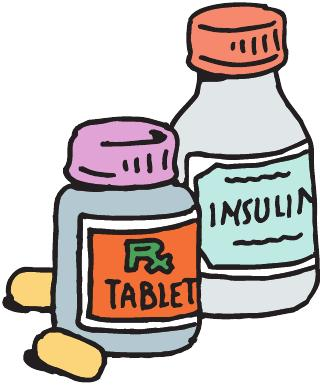

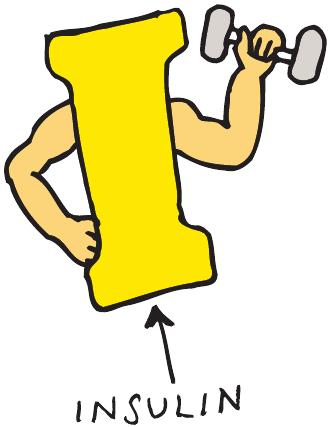

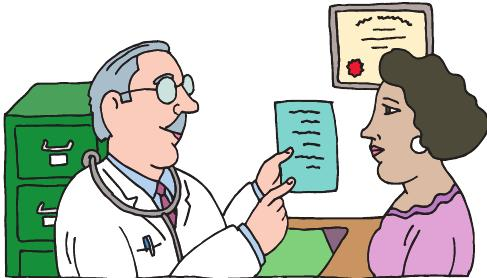

In [46]:
for e in relevant_images:
    display.display(display.Image(base64.b64decode(e)))

In [48]:
result_1, relevant_images_1 = answer("Blood vessel")
print(result_1)

A blood vessel is a tubular structure carrying blood in the circulatory system. The three types of blood vessels include arteries, veins, and capillaries. Arteries carry blood away from the heart, veins carry blood back to the heart, and capillaries connect arteries and veins. Within the blood vessels, there are different components of blood, including red blood cells, white blood cells, platelets, and plasma. In the context of diabetes, blood vessels can be affected over time due to high blood sugar levels, leading to complications such as heart disease, stroke, kidney disease, and other health problems. Maintaining good blood glucose control and regular check-ups can help prevent these complications. The image provided seems to represent a blood vessel with different components of blood, possibly including a representation of sugar or glucose, which is particularly relevant to the topic of diabetes.


In [49]:
relevant_images_1

['/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCAGCAokDASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwD3+iiigAooooAKKKw/Fl9eWOgTnTpRDfSjy4JWUMI2I+8QQc9PSgqEHOXLHc3KK8WsPGvxE0SQnUrOz1236kxFYpB9MAf+gmtWD47aGkvkanpOqWUwOHUorBD78g/pQVOjUp/GrHqlFcTafFvwRdsFGtCJj2mgkTH4lcfrW1

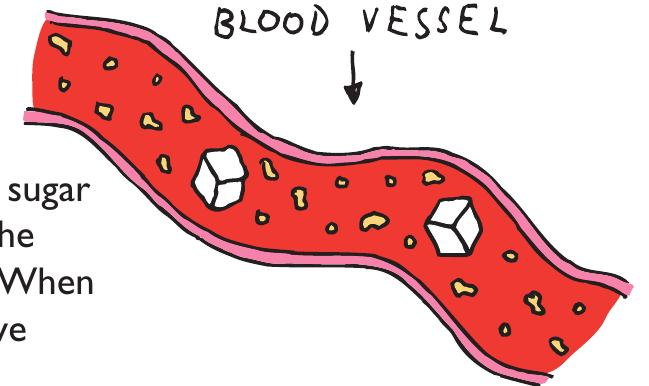

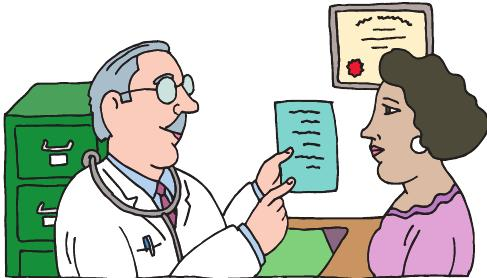

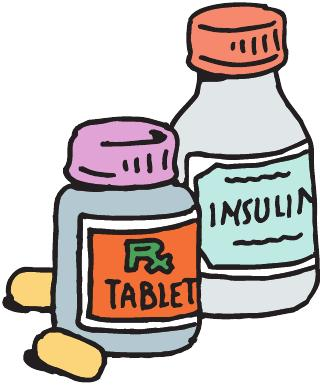

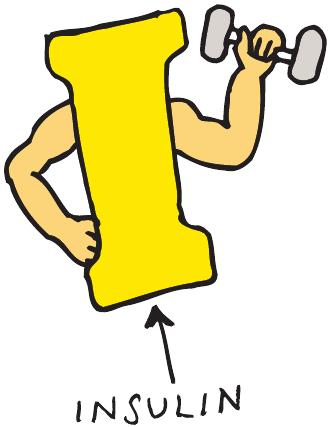

In [50]:
for e in relevant_images_1:
    display.display(display.Image(base64.b64decode(e)))

## Test if Retriever works fine for Textual Query

In [51]:
query = "What is Type 2 diabetes?"
docs = vectorstore.similarity_search(query)

In [52]:
docs

[Document(page_content='Type 2 diabetes occurs when the body does not produce enough insulin or the insulin produced does not work properly. This leads to high blood sugar levels. Eating healthy foods, being physically active, taking diabetes pills, and possibly insulin can help manage the condition. While diabetes cannot be cured, it can be controlled with proper management. Consult a doctor or health clinic for more information.', metadata={'id': '6cd72840-c134-4aae-9982-2a4470a9b09a', 'type': 'text', 'original_content': 'TYPE 2 DIABETES\n\nINSULIN\n\nWith type 2 diabetes, your body makes some insulin, but not enough. Or, the insulin your body makes does not work right.\n\nA\n\nMuch of the food you eat is changed by your body into a kind of sugar. The medical word for this sugar is glucose. Insulin helps sugar move from your blood into your body’s cells.\n\nBLood VESSEL 4 sugar the When\n\nBopY\n\nCELL\n\nIf you don’t have enough insulin to move sugar from your blood into your body’s

In [53]:
print(docs[0].page_content)

Type 2 diabetes occurs when the body does not produce enough insulin or the insulin produced does not work properly. This leads to high blood sugar levels. Eating healthy foods, being physically active, taking diabetes pills, and possibly insulin can help manage the condition. While diabetes cannot be cured, it can be controlled with proper management. Consult a doctor or health clinic for more information.
